1. Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

2. Load Data

In [2]:
data=pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


3. Exploratory Data Analysis


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Class Distribution:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


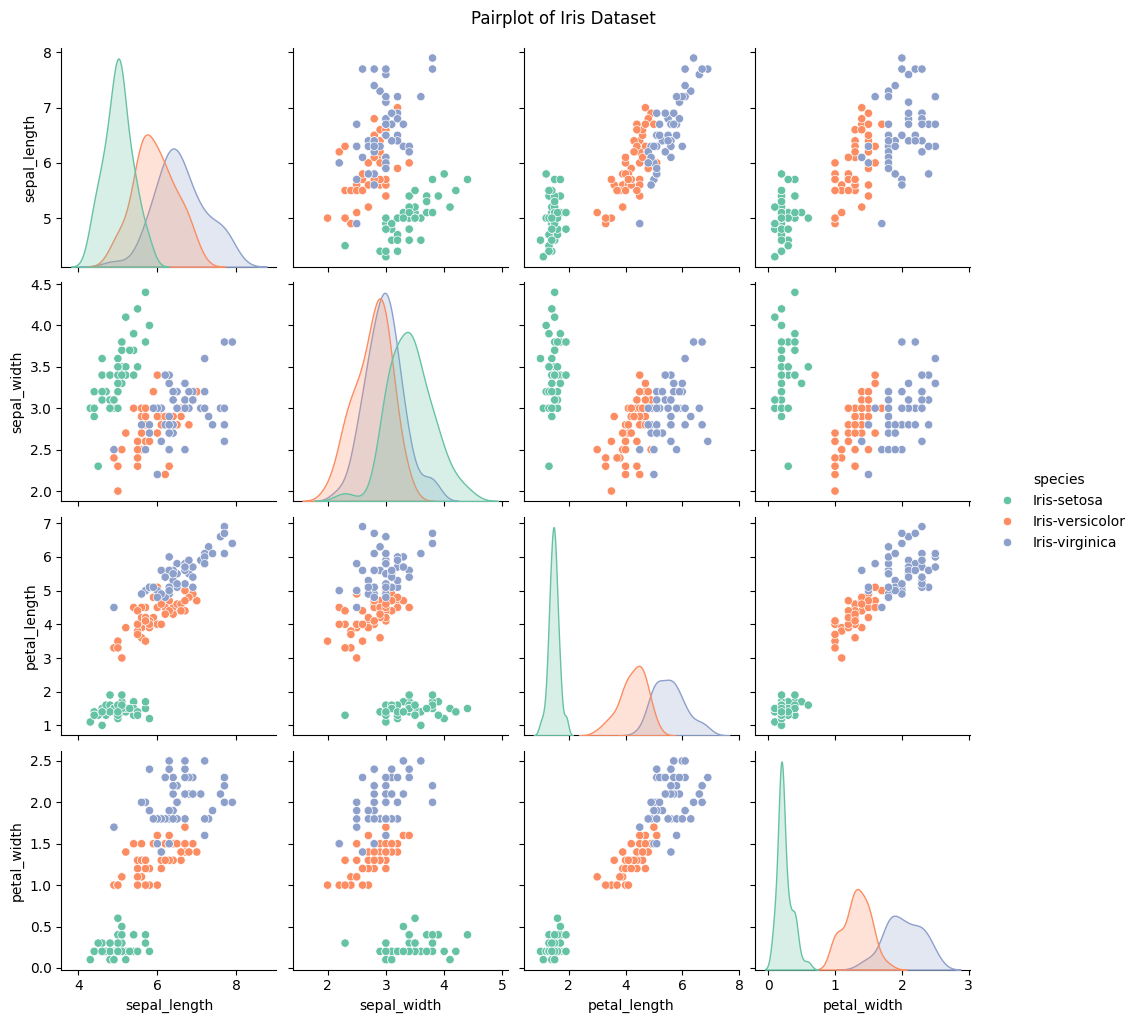

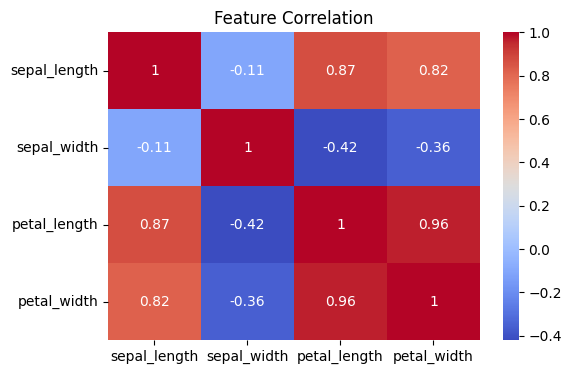

In [4]:
print("\nDataset Info:")
print(data.info())
print("\nClass Distribution:")
print(data['species'].value_counts())

# Pairplot (visualize feature distribution by species)
sns.pairplot(data, hue="species", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

4. Prepare Features & Labels

In [5]:
X = data.drop("species", axis=1)
y = data["species"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

5. Feature Scaling

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

6. Train Models

In [7]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

7. Evaluation


--- Logistic Regression ---
Accuracy: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30


--- Random Forest ---
Accuracy: 0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



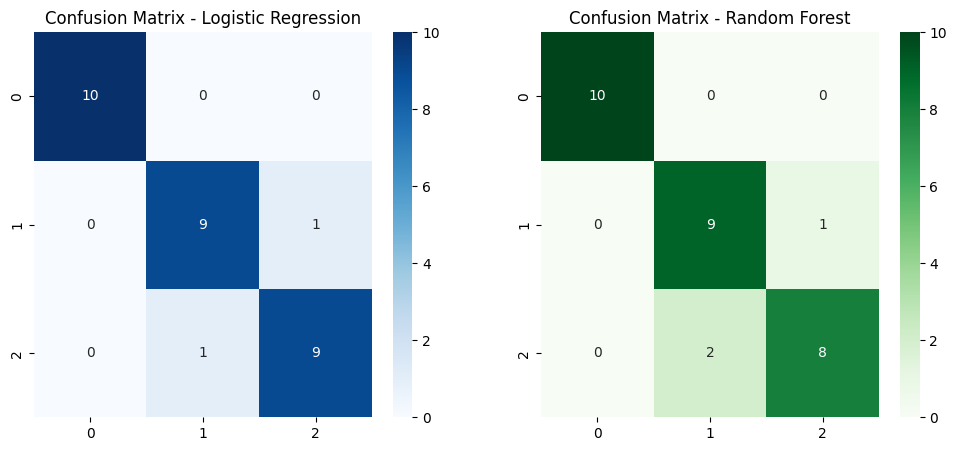

In [8]:
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")

plt.show()

In [15]:
print("\n--- Iris Flower Prediction ---")
sepal_length = float(input("Enter sepal length (cm): "))
sepal_width = float(input("Enter sepal width (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width = float(input("Enter petal width (cm): "))

# Create dataframe from user input
new_flower = pd.DataFrame({
    "sepal_length": [sepal_length],
    "sepal_width": [sepal_width],
    "petal_length": [petal_length],
    "petal_width": [petal_width]
})

# Scale for Logistic Regression
new_flower_scaled = scaler.transform(new_flower)

# Predict using both models
pred_lr = log_reg.predict(new_flower_scaled)[0]
pred_rf = rf.predict(new_flower)[0]

print("\nPredictions:")
print("Logistic Regression →", pred_lr)
print("Random Forest →", pred_rf)


--- Iris Flower Prediction ---

Predictions:
Logistic Regression → Iris-virginica
Random Forest → Iris-virginica
